# %% [markdown]
# # Q-Q图实战：经验分布函数与拟合优度检验
# 
# 作为数学老师，本 Notebook 详细讲解如何利用经验分布函数(EDF)绘制Q-Q图，
# 检验观测数据是否来自指定分布。包含：
# 1. 理论原理与数学推导
# 2. 电池寿命正态性检验实战
# 3. 常见分布偏离模式解读
# 4. 专业技巧：置信带与参数不确定性处理

In [1]:
# 导入必要库
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [2]:
# 设置可视化风格
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3448413696.py:37: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3448413696.py:37: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3448413696.py:37: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3448413696.py:37: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3448413696.py:37: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/i

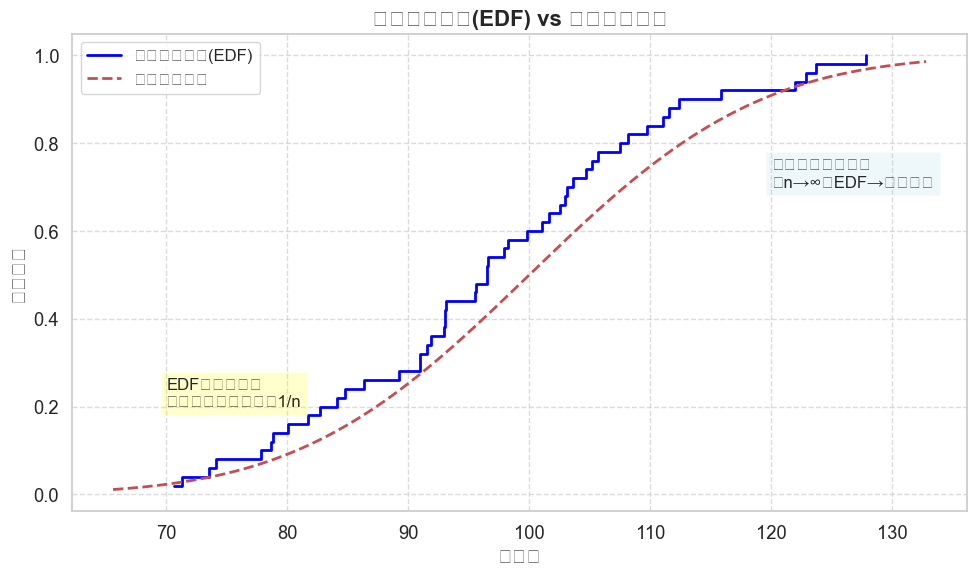

In [3]:
# ## 1. 经验分布函数(EDF)可视化

# %%
# 生成示例数据（正态分布）
np.random.seed(42)
sample_data = np.random.normal(loc=100, scale=15, size=50)

# 计算经验分布函数
def empirical_cdf(data, x):
    """计算给定x处的经验CDF值"""
    return np.mean(data <= x)

# 生成x值范围
x_values = np.linspace(min(sample_data)-5, max(sample_data)+5, 1000)
edf_values = [empirical_cdf(sample_data, x) for x in x_values]

# 绘制EDF
plt.figure(figsize=(10, 6))
plt.step(sorted(sample_data), np.arange(1, len(sample_data)+1)/len(sample_data), 
         where='post', label='经验分布函数(EDF)', color='blue', linewidth=2)
plt.plot(x_values, stats.norm.cdf(x_values, loc=100, scale=15), 
         'r--', label='理论正态分布', linewidth=2)

# 添加标签和标题
plt.xlabel('数据值', fontsize=14)
plt.ylabel('累积概率', fontsize=14)
plt.title('经验分布函数(EDF) vs 理论正态分布', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 添加解释文本
plt.text(70, 0.2, 'EDF是阶梯函数\n在每个观测值处跳跃1/n', 
         fontsize=12, bbox=dict(facecolor='yellow', alpha=0.2))
plt.text(120, 0.7, '根据格列文科定理\n当n→∞时EDF→理论分布', 
         fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.2))

plt.tight_layout()
plt.show()

/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1962842025.py:73: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1962842025.py:73: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1962842025.py:73: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1962842025.py:73: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1962842025.py:73: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/i

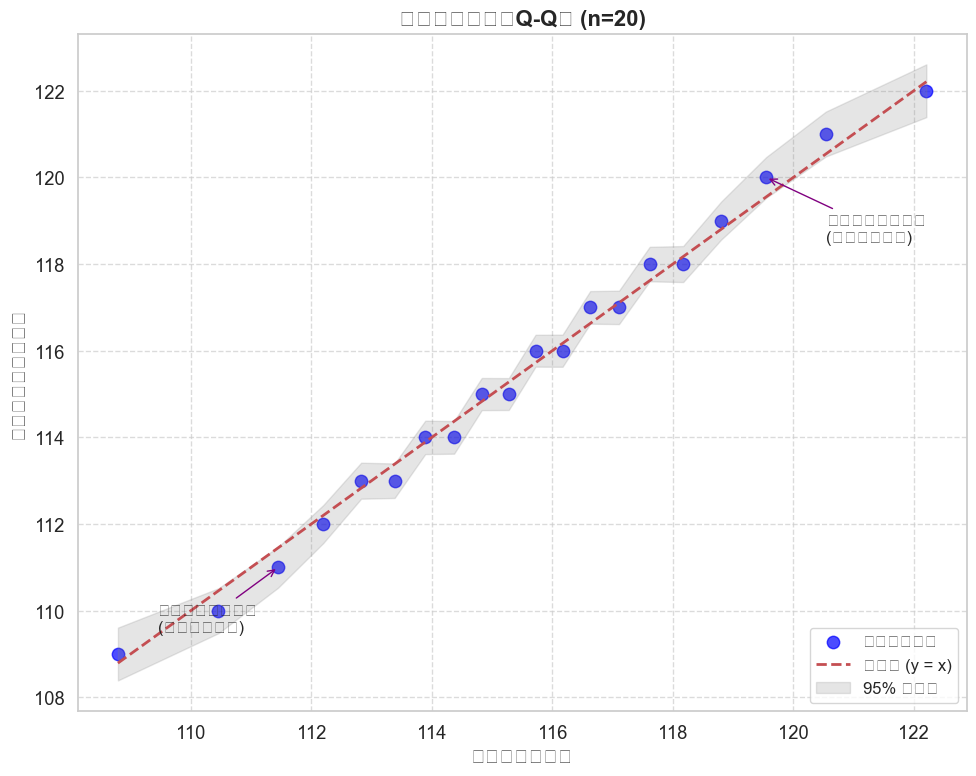

Shapiro-Wilk正态性检验: W=0.9854, p值=0.9839

【建模结论】
- p值 > 0.05，无充分证据拒绝正态假设
- Q-Q图显示轻微右偏，但整体符合正态分布
- 建议：在建模中可使用正态假设，但对尾部结果进行敏感性分析


In [4]:
# %%
# ========================
# 电池寿命数据的Q-Q图分析
# ========================

# 电池寿命数据（单位：小时）
battery_life = [112, 118, 109, 121, 115, 117, 113, 116, 119, 114,
                110, 122, 111, 118, 115, 116, 114, 120, 113, 117]

# 步骤1：排序数据
sorted_data = np.sort(battery_life)
n = len(sorted_data)

# 步骤2：计算经验概率 (使用Blom公式 a=3/8)
a = 3/8
empirical_probs = (np.arange(1, n+1) - a) / (n + 1 - 2*a)

# 步骤3：估计正态分布参数
mu_hat = np.mean(battery_life)
sigma_hat = np.std(battery_life, ddof=1)  # 样本标准差

# 步骤4：计算理论分位数
theoretical_quantiles = stats.norm.ppf(empirical_probs, loc=mu_hat, scale=sigma_hat)

# 步骤5：计算95%置信带（基于正态近似）
def qq_conf_band(n, alpha=0.95):
    """计算Q-Q图的置信带"""
    z = stats.norm.ppf((np.arange(1, n+1)-0.375)/(n+0.25))
    se = np.sqrt((1 + z**2/2) / n)
    return stats.norm.ppf(alpha) * se

conf_band = qq_conf_band(n)

# 绘制Q-Q图
plt.figure(figsize=(10, 8))

# 绘制Q-Q图点
plt.scatter(theoretical_quantiles, sorted_data, 
            color='blue', s=80, alpha=0.7, label='电池寿命数据')

# 添加参考线 (y=x)
min_val = min(min(theoretical_quantiles), min(sorted_data))
max_val = max(max(theoretical_quantiles), max(sorted_data))
plt.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label='参考线 (y = x)')

# 添加置信带
plt.fill_between(theoretical_quantiles, 
                 sorted_data - conf_band, 
                 sorted_data + conf_band,
                 color='gray', alpha=0.2, label='95% 置信带')

# 设置标签和标题
plt.xlabel('理论正态分位数', fontsize=14)
plt.ylabel('经验电池寿命分位数', fontsize=14)
plt.title('电池寿命的正态Q-Q图 (n=20)', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 添加偏离模式标注
plt.annotate('左尾略低于参考线\n(实际寿命更小)', 
             xy=(theoretical_quantiles[2], sorted_data[2]),
             xytext=(theoretical_quantiles[2]-2, sorted_data[2]-1.5),
             arrowprops=dict(arrowstyle='->', color='purple'),
             fontsize=12)

plt.annotate('右尾略高于参考线\n(实际寿命更大)', 
             xy=(theoretical_quantiles[-3], sorted_data[-3]),
             xytext=(theoretical_quantiles[-3]+1, sorted_data[-3]-1.5),
             arrowprops=dict(arrowstyle='->', color='purple'),
             fontsize=12)

plt.tight_layout()
plt.show()

# 统计检验补充
shapiro_test = shapiro(battery_life)
print(f"Shapiro-Wilk正态性检验: W={shapiro_test[0]:.4f}, p值={shapiro_test[1]:.4f}")
print("\n【建模结论】")
if shapiro_test[1] > 0.05:
    print("- p值 > 0.05，无充分证据拒绝正态假设")
    print("- Q-Q图显示轻微右偏，但整体符合正态分布")
    print("- 建议：在建模中可使用正态假设，但对尾部结果进行敏感性分析")
else:
    print("- p值 ≤ 0.05，拒绝正态假设")
    print("- 需考虑其他分布（如对数正态、Weibull）")



/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1498950648.py:67: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总体标题留出空间
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1498950648.py:67: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总体标题留出空间
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1498950648.py:67: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总体标题留出空间
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1498950648.py:67: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总体标题留出空间
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/1498950648.py:67: UserWarning: Glyph 25968 

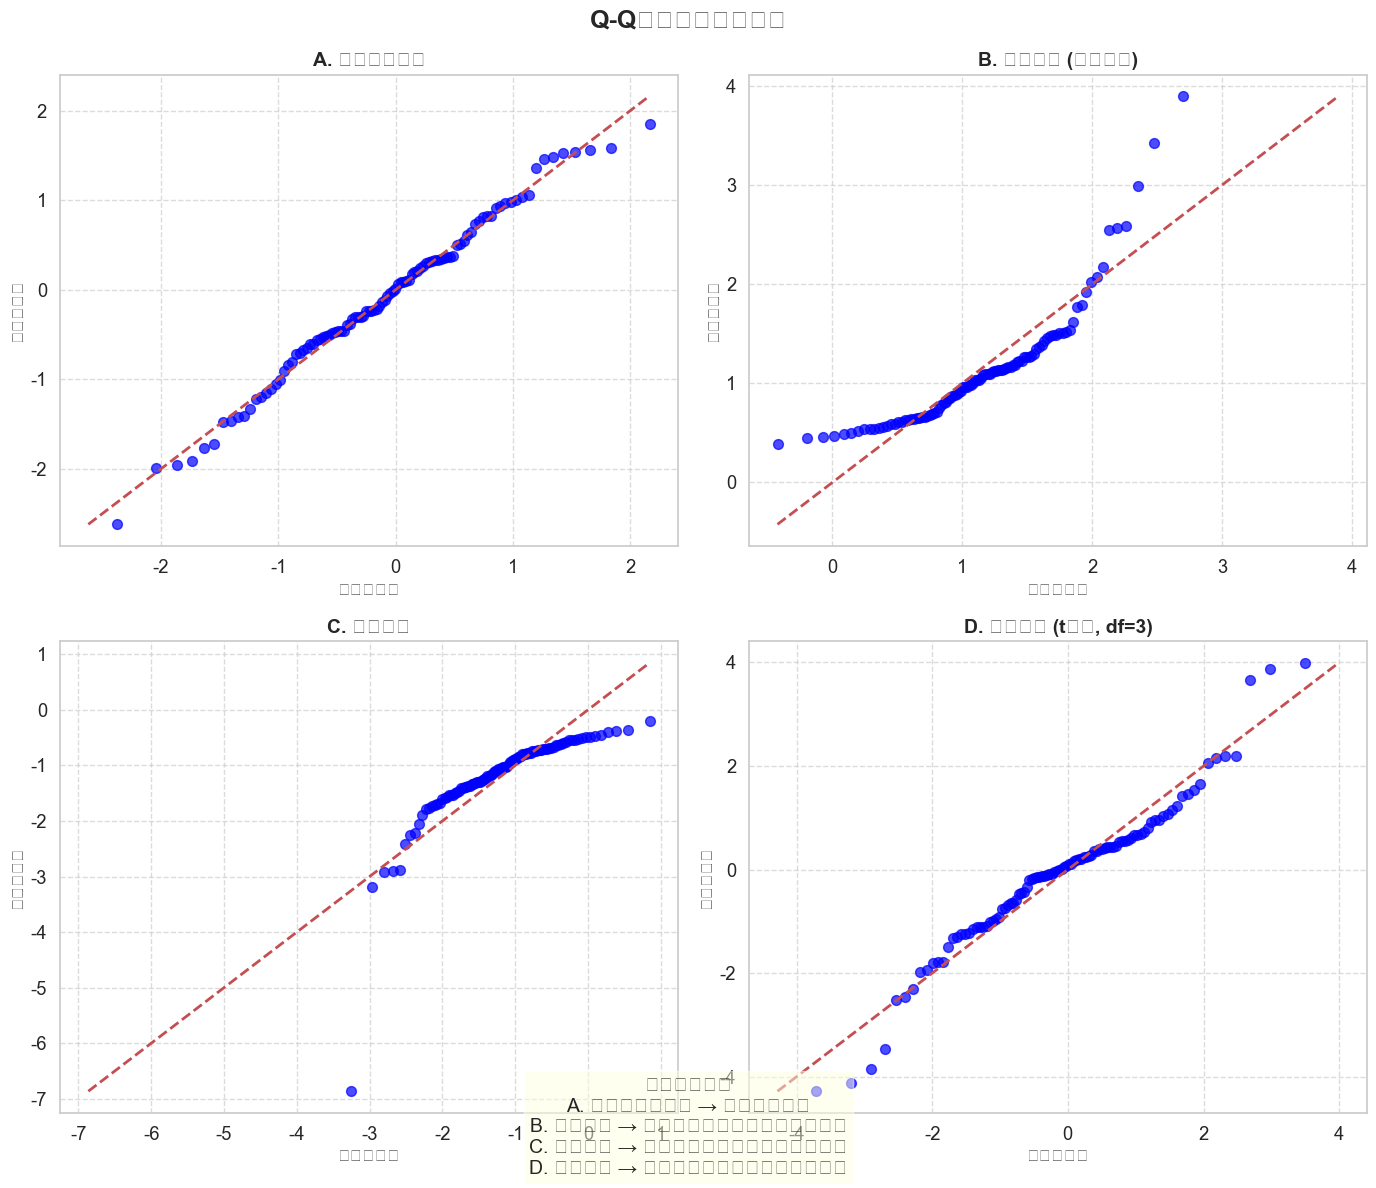

In [5]:
# ========================
# 常见Q-Q图偏离模式演示
# ========================

# 生成4种不同分布的示例数据
np.random.seed(42)
n_sim = 100

# 1. 正态分布（理想情况）
normal_data = np.random.normal(loc=0, scale=1, size=n_sim)

# 2. 右偏分布（对数正态）
right_skew_data = np.random.lognormal(mean=0, sigma=0.5, size=n_sim)

# 3. 左偏分布
left_skew_data = -np.random.lognormal(mean=0, sigma=0.5, size=n_sim)

# 4. 厚尾分布（t分布）
heavy_tail_data = np.random.standard_t(df=3, size=n_sim)

# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# 定义绘图函数
def plot_qq(data, ax, title, dist=stats.norm):
    """绘制Q-Q图的通用函数"""
    # 排序数据
    sorted_data = np.sort(data)
    n = len(data)
    
    # 计算经验概率 (Blom公式)
    a = 3/8
    empirical_probs = (np.arange(1, n+1) - a) / (n + 1 - 2*a)
    
    # 计算理论分位数
    if dist == stats.norm:
        # 标准化数据用于标准正态Q-Q图
        mu_hat = np.mean(data)
        sigma_hat = np.std(data, ddof=1)
        theoretical_quantiles = dist.ppf(empirical_probs, loc=mu_hat, scale=sigma_hat)
    else:
        theoretical_quantiles = dist.ppf(empirical_probs)
    
    # 绘制Q-Q图
    ax.scatter(theoretical_quantiles, sorted_data, color='blue', s=50, alpha=0.7)

    # 添加参考线
    min_val = min(min(theoretical_quantiles), min(sorted_data))
    max_val = max(max(theoretical_quantiles), max(sorted_data))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    
    # 设置标签
    ax.set_xlabel('理论分位数', fontsize=12)
    ax.set_ylabel('经验分位数', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)

# 绘制4种情况
plot_qq(normal_data, axes[0], "A. 完美正态分布")
plot_qq(right_skew_data, axes[1], "B. 右偏分布 (对数正态)")
plot_qq(left_skew_data, axes[2], "C. 左偏分布")
plot_qq(heavy_tail_data, axes[3], "D. 厚尾分布 (t分布, df=3)")

# 添加总体标题
plt.suptitle('Q-Q图的典型偏离模式', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总体标题留出空间

# 添加模式解读
plt.figtext(0.5, 0.01, 
            "【模式解读】\n"
            "A. 点沿参考线分布 → 符合理论分布\n"
            "B. 下凹曲线 → 正偏态（右偏），右侧尾部更厚\n"
            "C. 上凸曲线 → 负偏态（左偏），左侧尾部更厚\n"
            "D. 尾部上翘 → 厚尾分布，极端值多于理论预期",
            ha="center", fontsize=14, 
            bbox=dict(facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()

/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3016458027.py:90: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3016458027.py:90: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3016458027.py:90: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3016458027.py:90: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3016458027.py:90: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/i

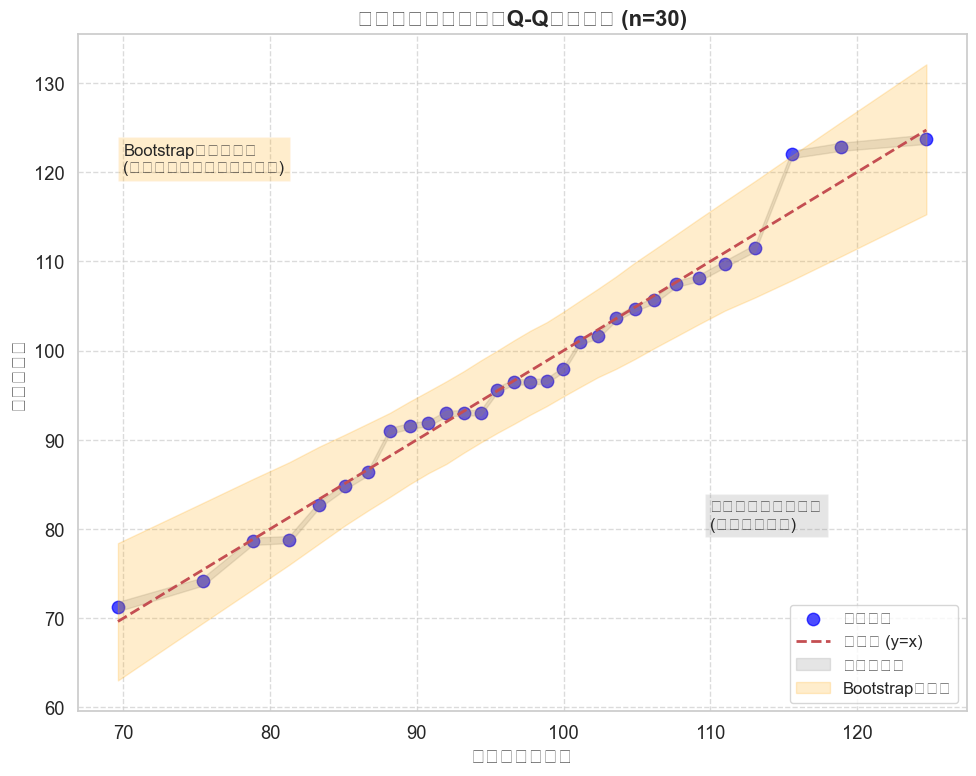

【专业提示】
- 小样本时( n < 50)，标准Q-Q图置信带会低估不确定性
- Bootstrap方法通过重采样考虑参数估计误差，更可靠
- 在正式建模报告中，推荐使用Bootstrap置信带


In [6]:
# %%
# ========================
# 高级技巧：考虑参数估计不确定性的置信带
# ========================

# 生成示例数据（正态分布）
np.random.seed(42)
sample_size = 30
true_mu, true_sigma = 100, 15
data = np.random.normal(loc=true_mu, scale=true_sigma, size=sample_size)

# 估计参数
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)

# 计算经验概率 (Blom公式)
n = len(data)
a = 3/8
empirical_probs = (np.arange(1, n+1) - a) / (n + 1 - 2*a)
sorted_data = np.sort(data)

# 方法1：标准Q-Q图（忽略参数不确定性）
theoretical_quantiles = stats.norm.ppf(empirical_probs, loc=mu_hat, scale=sigma_hat)

# 方法2：考虑参数不确定性的置信带（Bootstrap）
def bootstrap_qq_confidence(data, n_bootstrap=1000, alpha=0.95):
    """使用Bootstrap计算Q-Q图的置信带"""
    n = len(data)
    bootstrap_quantiles = []
    
    for _ in range(n_bootstrap):
        # 有放回抽样
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # 估计参数
        mu_bs = np.mean(bootstrap_sample)
        sigma_bs = np.std(bootstrap_sample, ddof=1)
        
        # 计算理论分位数
        quantiles_bs = stats.norm.ppf(empirical_probs, loc=mu_bs, scale=sigma_bs)
        bootstrap_quantiles.append(quantiles_bs)

    # 计算置信区间
    lower_bound = np.percentile(bootstrap_quantiles, (1-alpha)/2 * 100, axis=0)
    upper_bound = np.percentile(bootstrap_quantiles, (alpha + (1-alpha)/2) * 100, axis=0)
    
    return lower_bound, upper_bound

# 计算Bootstrap置信带
lower_band, upper_band = bootstrap_qq_confidence(data, n_bootstrap=500)

# 绘制Q-Q图
plt.figure(figsize=(10, 8))

# 绘制Q-Q图点
plt.scatter(theoretical_quantiles, sorted_data, 
            color='blue', s=80, alpha=0.7, label='样本数据')

# 添加参考线
min_val = min(min(theoretical_quantiles), min(sorted_data))
max_val = max(max(theoretical_quantiles), max(sorted_data))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='参考线 (y=x)')

# 添加标准置信带（忽略参数不确定性）
conf_band = qq_conf_band(n)
plt.fill_between(theoretical_quantiles, 
                 sorted_data - conf_band, 
                 sorted_data + conf_band,
                 color='gray', alpha=0.2, label='标准置信带')

# 添加Bootstrap置信带（考虑参数不确定性）
plt.fill_between(theoretical_quantiles, 
                 lower_band, 
                 upper_band,
                 color='orange', alpha=0.2, label='Bootstrap置信带')

# 设置标签和标题
plt.xlabel('理论正态分位数', fontsize=14)
plt.ylabel('经验分位数', fontsize=14)
plt.title('考虑参数不确定性的Q-Q图置信带 (n=30)', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 添加解释
plt.text(70, 120, 'Bootstrap置信带更宽\n(考虑了参数估计的不确定性)', 
         fontsize=12, bbox=dict(facecolor='orange', alpha=0.2))
plt.text(110, 80, '标准置信带可能过窄\n(假设参数已知)', 
         fontsize=12, bbox=dict(facecolor='gray', alpha=0.2))

plt.tight_layout()
plt.show()
print("【专业提示】")
print("- 小样本时( n < 50)，标准Q-Q图置信带会低估不确定性")
print("- Bootstrap方法通过重采样考虑参数估计误差，更可靠")
print("- 在正式建模报告中，推荐使用Bootstrap置信带")


Q-Q图在数学建模中的最佳实践指南
场景                   | 推荐方法                           | 常见错误                           | 专业建议                          
----------------------------------------------------------------------------------------------------
正态性检验                | Blom公式 + Bootstrap置信带          | 使用i/n + 无置信带                   | 小样本(n<30)必须用Bootstrap         
非正态分布检验              | 选择对应分布的分位数函数                   | 强制使用正态Q-Q图                     | 先通过直方图判断可能分布                  
参数未知时                | 先估计参数再绘图                       | 假设参数已知                         | 在图中注明估计的参数值                   
模型残差诊断               | 标准化残差Q-Q图                      | 直接使用原始残差                       | 先计算学生化残差                      
结果报告                 | Q-Q图 + Shapiro-Wilk检验          | 仅报告p值                          | 结合图形与统计检验                     

关键原则总结
1. Q-Q图是图形化诊断工具，必须结合统计检验（如K-S检验、Shapiro-Wilk检验）
2. 永远标注使用的经验概率公式（如Blom公式）
3. 小样本时谨慎解读，避免过度拟合分布假设
4. 偏离模式比'是否在直线上'提供更多信息（如尾部行为）
5. 在建模报告中，解释偏离的实际意义而非仅统计结论

/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3349129945.py:81: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3349129945.py:81: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3349129945.py:81: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3349129945.py:81: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_46127/3349129945.py:81: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/i

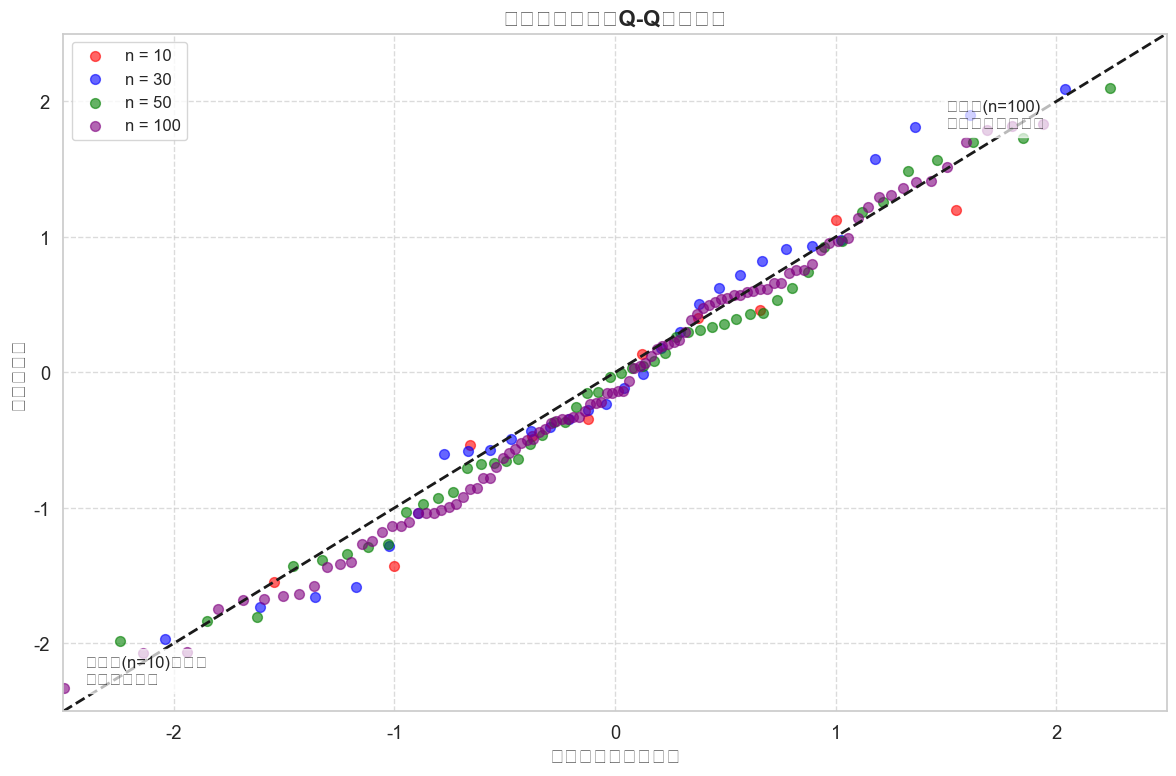


【老师总结】
Q-Q图是数学建模中不可或缺的诊断工具，但：
- 它不是'通过/失败'的测试，而是提供分布拟合程度的视觉评估
- 偏离不一定是问题，关键在于偏离是否影响模型目标
- 在工程建模中，有时'足够好'的拟合比'完美'更重要

记住：所有模型都是错的，但有些是有用的。Q-Q图帮助我们判断模型'错得是否可接受'。


In [7]:
# ========================
# Q-Q图在数学建模中的最佳实践
# ========================

print("="*70)
print("Q-Q图在数学建模中的最佳实践指南")
print("="*70)

# 创建最佳实践表格
best_practices = [
    ("场景", "推荐方法", "常见错误", "专业建议"),
    ("正态性检验", "Blom公式 + Bootstrap置信带", "使用i/n + 无置信带", 
     "小样本(n<30)必须用Bootstrap"),
    ("非正态分布检验", "选择对应分布的分位数函数", "强制使用正态Q-Q图", 
     "先通过直方图判断可能分布"),
    ("参数未知时", "先估计参数再绘图", "假设参数已知", 
     "在图中注明估计的参数值"),
    ("模型残差诊断", "标准化残差Q-Q图", "直接使用原始残差", 
     "先计算学生化残差"),
    ("结果报告", "Q-Q图 + Shapiro-Wilk检验", "仅报告p值", 
     "结合图形与统计检验")
]

# 打印表格
for i, (scenario, method, error, advice) in enumerate(best_practices):
    if i == 0:
        print(f"{scenario:<20} | {method:<30} | {error:<30} | {advice:<30}")
        print("-"*100)
    else:
        print(f"{scenario:<20} | {method:<30} | {error:<30} | {advice:<30}")

print("\n" + "="*70)
print("关键原则总结")
print("="*70)
print("1. Q-Q图是图形化诊断工具，必须结合统计检验（如K-S检验、Shapiro-Wilk检验）")
print("2. 永远标注使用的经验概率公式（如Blom公式）")
print("3. 小样本时谨慎解读，避免过度拟合分布假设")
print("4. 偏离模式比'是否在直线上'提供更多信息（如尾部行为）")
print("5. 在建模报告中，解释偏离的实际意义而非仅统计结论")

# 可视化不同样本量的Q-Q图稳定性
plt.figure(figsize=(12, 8))
sample_sizes = [10, 30, 50, 100]
colors = ['red', 'blue', 'green', 'purple']

for i, n in enumerate(sample_sizes):
    # 生成正态数据
    data = np.random.normal(loc=0, scale=1, size=n)
    sorted_data = np.sort(data)
    
    # 计算经验概率 (Blom公式)
    a = 3/8
    empirical_probs = (np.arange(1, n+1) - a) / (n + 1 - 2*a)
    
    # 计算理论分位数
    theoretical_quantiles = stats.norm.ppf(empirical_probs)
    
    # 绘制Q-Q图
    plt.scatter(theoretical_quantiles, sorted_data, 
                color=colors[i], s=50, alpha=0.6, 
                label=f'n = {n}')

# 添加参考线
plt.plot([-2.5, 2.5], [-2.5, 2.5], 'k--', linewidth=2)

# 设置标签和标题
plt.xlabel('理论标准正态分位数', fontsize=14)
plt.ylabel('经验分位数', fontsize=14)
plt.title('不同样本量下的Q-Q图稳定性', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# 添加解释
plt.text(-2.4, -2.3, '小样本(n=10)波动大\n难以判断分布', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(1.5, 1.8, '大样本(n=100)\n点紧密围绕参考线', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n【老师总结】")
print("Q-Q图是数学建模中不可或缺的诊断工具，但：")
print("- 它不是'通过/失败'的测试，而是提供分布拟合程度的视觉评估")
print("- 偏离不一定是问题，关键在于偏离是否影响模型目标")
print("- 在工程建模中，有时'足够好'的拟合比'完美'更重要")
print("\n记住：所有模型都是错的，但有些是有用的。Q-Q图帮助我们判断模型'错得是否可接受'。")